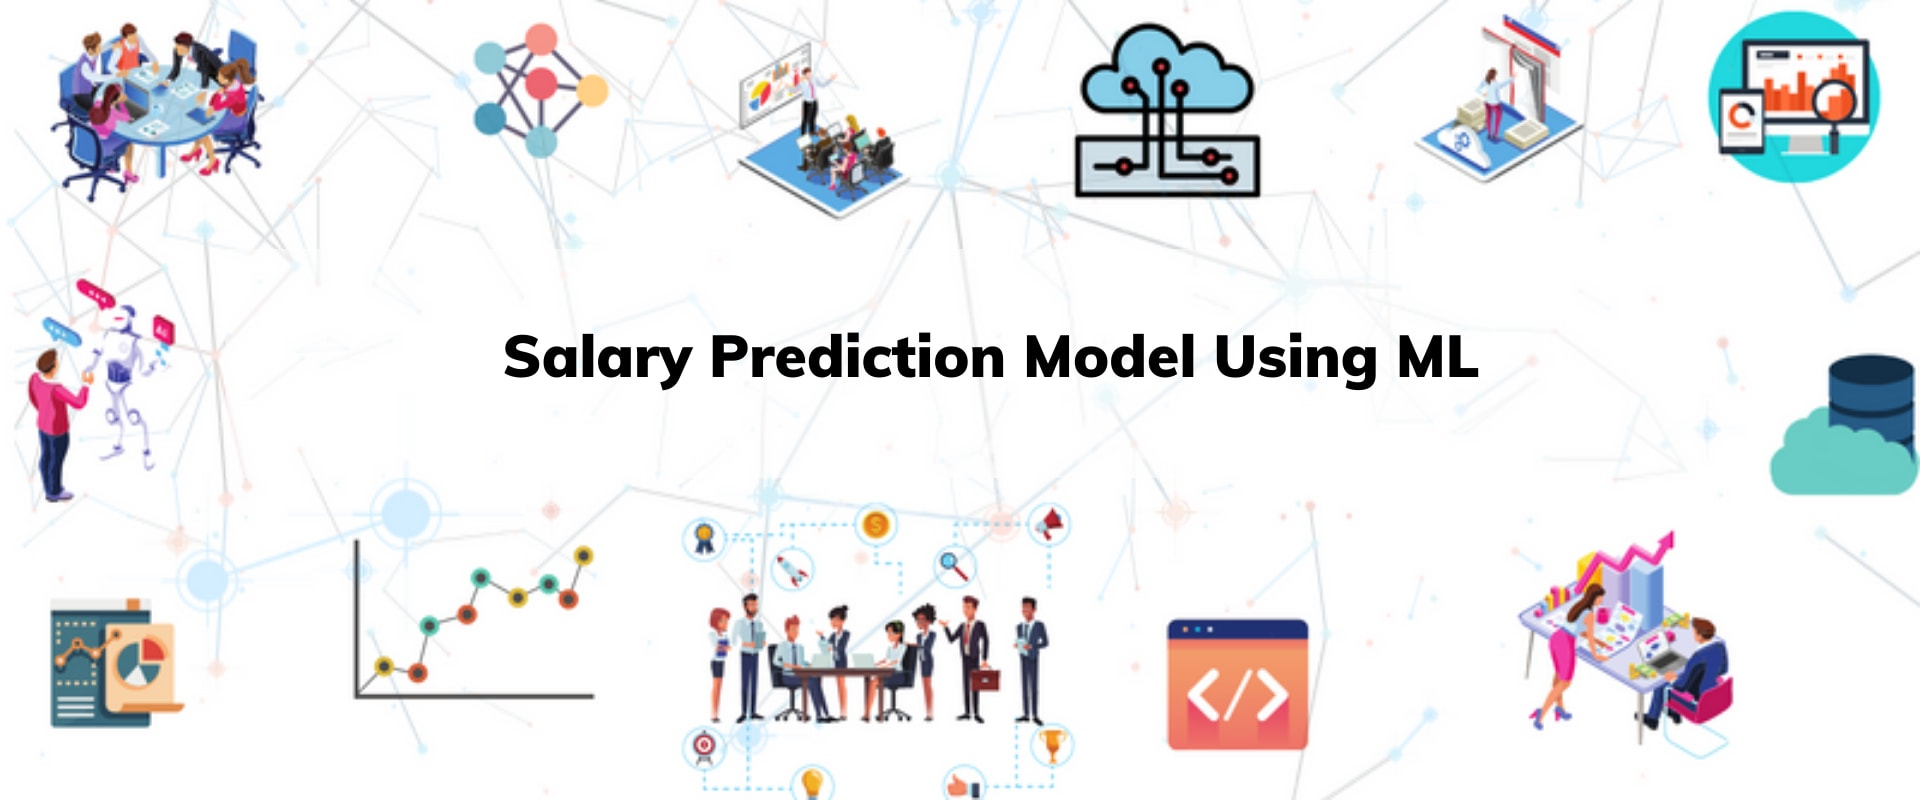

A machine learning project was developed to predict the salaries of baseball players whose salary information and career statistics from 1986 were shared.

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>About Dataset</b></p>
https://www.kaggle.com/datasets/mathchi/hitters-baseball-data

**Baseball Data**

**Description**

Major League Baseball Data from the 1986 and 1987 seasons.

**Usage**
Hitters

**Format**
A data frame with 322 observations of major league players on the following 20 variables.

- AtBat: Number of times at bat in 1986

- Hits: Number of hits in 1986

- HmRun: Number of home runs in 1986

- Runs: Number of runs in 1986

- RBI: Number of runs batted in in 1986

- Walks: Number of walks in 1986

- Years: Number of years in the major leagues

- CAtBat: Number of times at bat during his career

- CHits: Number of hits during his career

- CHmRun: Number of home runs during his career

- CRuns: Number of runs during his career

- CRBI: Number of runs batted in during his career

- CWalks: Number of walks during his career

- League: A factor with levels A and N indicating player's league at the end of 1986

- Division: A factor with levels E and W indicating player's division at the end of 1986

- PutOuts: Number of put outs in 1986

- Assists: Number of assists in 1986

- Errors: Number of errors in 1986

- Salary: 1987 annual salary on opening day in thousands of dollars

- NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987


**Source**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.


**References**
Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Importing Basic Libraries and the Dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Understanding the Dataset</b></p>

In [3]:
df.shape

(322, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Let's check null values and duplicate rows:

In [6]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df[df.duplicated()]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague


Let's drop null values (no duplicate row):

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(263, 20)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Handling Outliers</b></p>

In [10]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [11]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical

['League', 'Division', 'NewLeague']

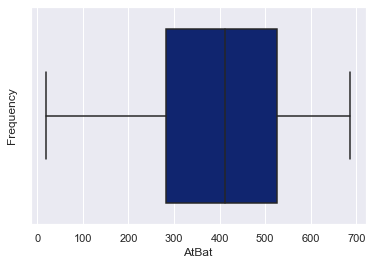

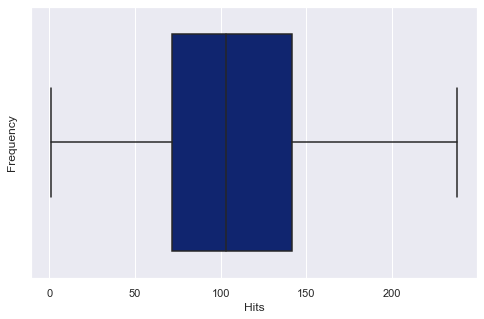

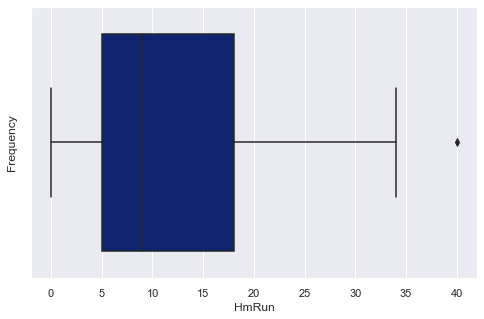

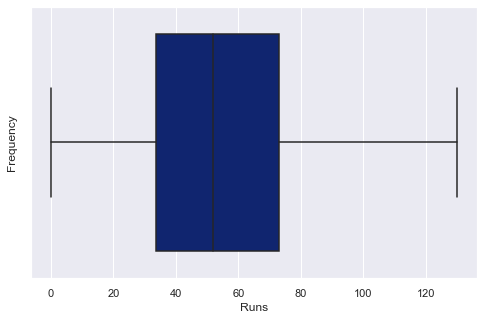

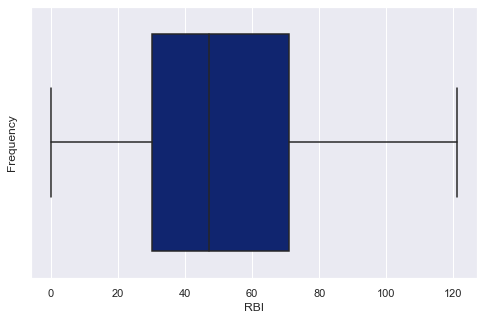

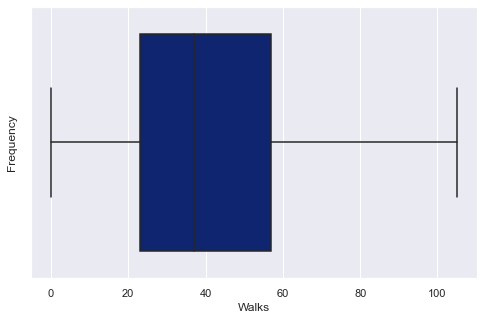

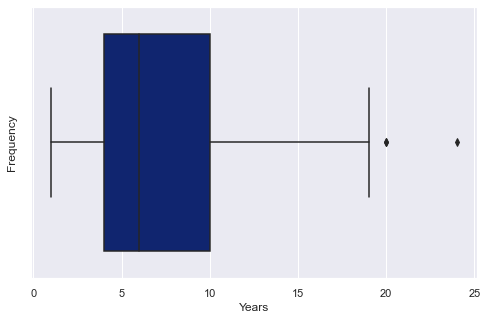

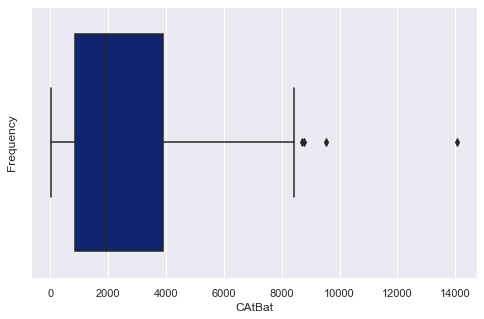

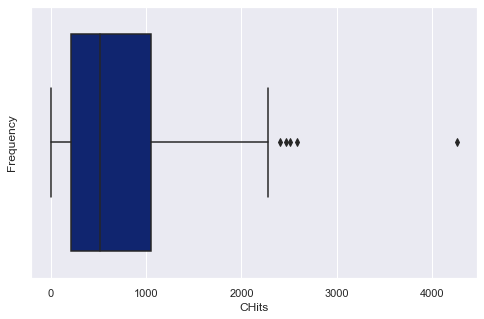

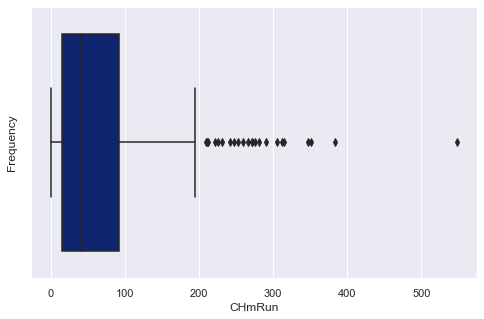

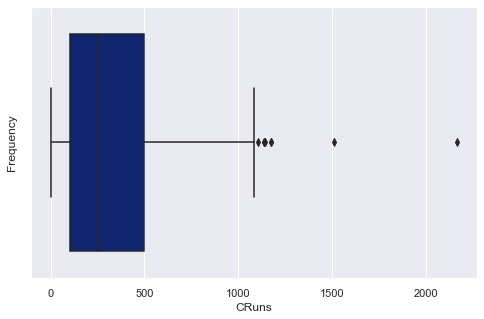

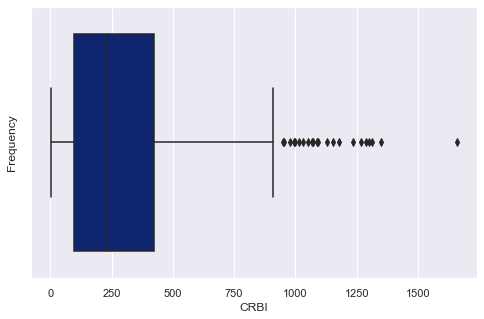

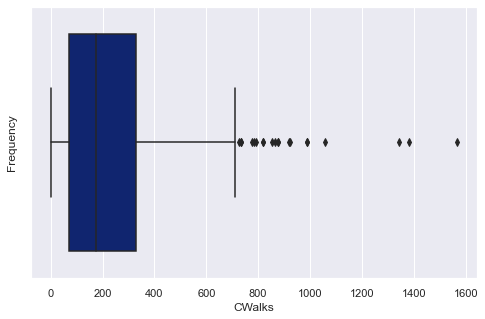

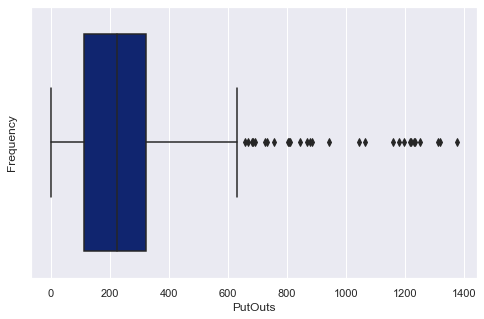

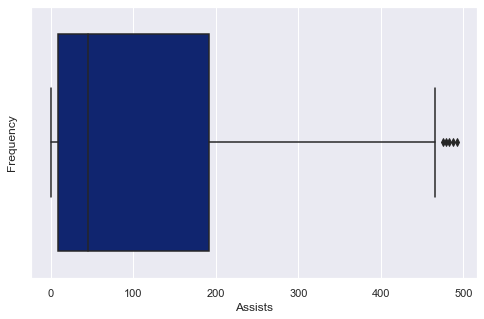

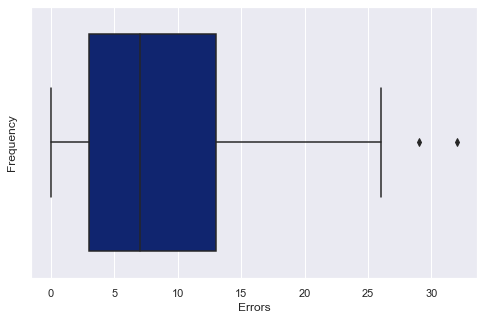

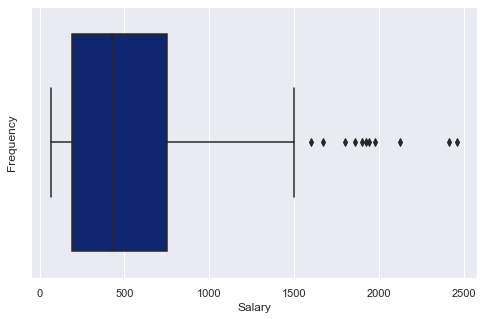

In [12]:
import seaborn as sns

for i in Numerical:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i, ylabel='Frequency')
    sns.boxplot(df[i], palette='dark');

Let's check outliers that fall with +/- 10% boundaries:

In [13]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.10)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [14]:
for i in Numerical:
    num_outlier(df, i)
    print("*"*40)

Number of outliers in AtBat column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Hits column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in HmRun column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Runs column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in RBI column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Walks column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Years column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in CAtBat column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in CHits column:  1
Inde

In [15]:
df.shape

(263, 20)

Let's remove them:

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.10)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [17]:
for i in Numerical:
    remove_outlier(df, i)
    print("*"*40)

Outliers in the AtBat column have been removed
****************************************
Outliers in the Hits column have been removed
****************************************
Outliers in the HmRun column have been removed
****************************************
Outliers in the Runs column have been removed
****************************************
Outliers in the RBI column have been removed
****************************************
Outliers in the Walks column have been removed
****************************************
Outliers in the Years column have been removed
****************************************
Outliers in the CAtBat column have been removed
****************************************
Outliers in the CHits column have been removed
****************************************
Outliers in the CHmRun column have been removed
****************************************
Outliers in the CRuns column have been removed
****************************************
Outliers in the CRBI column have b

In [18]:
df.shape

(261, 20)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Correlation Analysis</b></p>

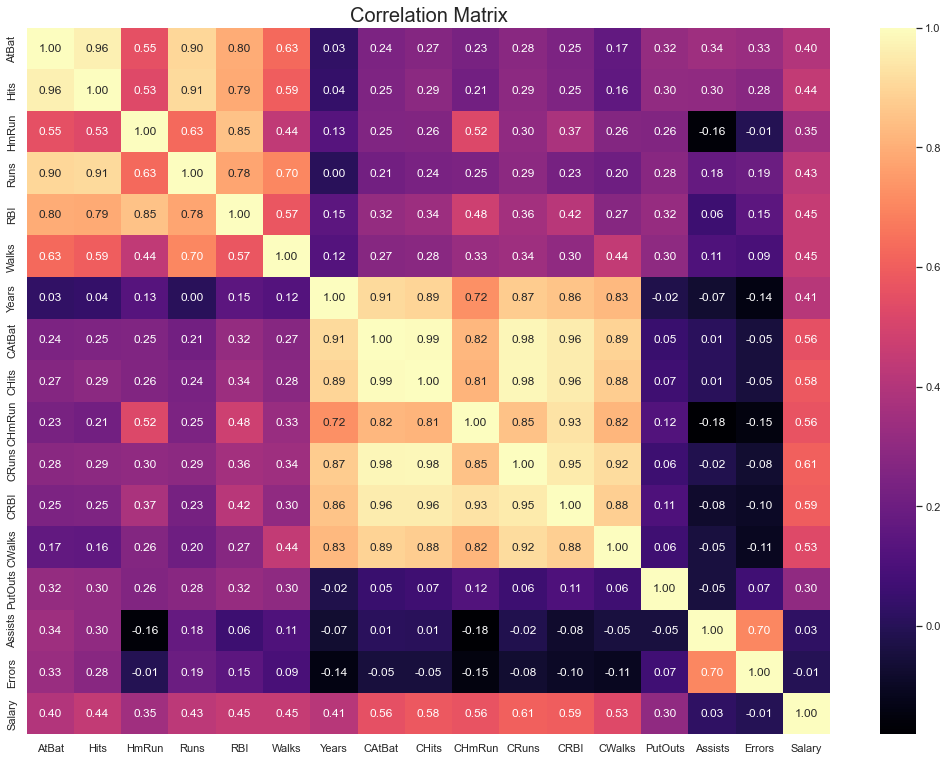

In [19]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

The two variables with the highest correlation with Salary:

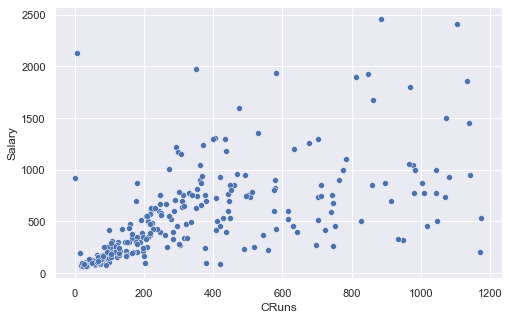

In [20]:
sns.scatterplot(x= df['CRuns'], y=df.Salary);

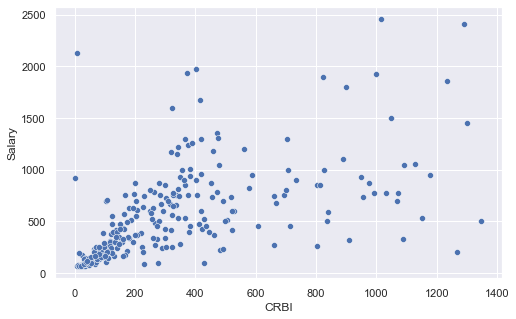

In [21]:
sns.scatterplot(x= df['CRBI'], y=df.Salary);

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Feature Engineering (Selection)</b></p>

Using the most appropriate features based on their proportions, new features were created:

In [22]:
df['AtBat_new'] = df['AtBat'] / (df['CAtBat']+ 0.00001)
df['Hits_new'] = df['Hits'] / (df['CHits']+ 0.00001)
df['HmRun_new'] = df['HmRun'] / (df['CHmRun']+ 0.00001)
df['Runs_new'] = df['Runs'] / (df['CRuns']+ 0.00001)
df['RBI_new'] = df['RBI'] / (df['CRBI']+ 0.00001)
df['Walks_new'] = df['Walks'] / (df['CWalks']+ 0.00001)

In [23]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,AtBat_new,Hits_new,HmRun_new,Runs_new,RBI_new,Walks_new
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,0.091331,0.097006,0.101449,0.074766,0.091787,0.104000
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,0.294951,0.284464,0.285714,0.294643,0.270677,0.288973
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,0.088131,0.089524,0.088889,0.078502,0.093079,0.104520
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,0.810606,0.861386,0.833333,0.812500,0.913043,0.909091
5,594,169,4,74,51,35,11,4408,1133,19,...,421,25,750.0,A,0.134755,0.149162,0.210526,0.147705,0.151786,0.180412


In [24]:
df1= df.copy()

Let's apply LabelEncoder to columns:

In [25]:
from sklearn.preprocessing import LabelEncoder
df2 = df1.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,AtBat_new,Hits_new,HmRun_new,Runs_new,RBI_new,Walks_new
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,1,0.091331,0.097006,0.101449,0.074766,0.091787,0.104000
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,0,0.294951,0.284464,0.285714,0.294643,0.270677,0.288973
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,1,0.088131,0.089524,0.088889,0.078502,0.093079,0.104520
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,1,0.810606,0.861386,0.833333,0.812500,0.913043,0.909091
5,594,169,4,74,51,35,11,4408,1133,19,...,421,25,750.0,0,0.134755,0.149162,0.210526,0.147705,0.151786,0.180412


Now let's fit feature selection into our dataset. On a given data, we will try a very powerful and popular model - Random Forest Regression with **SequentialFeatureSelector**. "Salary" will be used as the predicted label and the remaining features to find the dependency for the prediction. Let's separate those:

In [26]:
XF= df2.drop(["Salary"], axis=1)
yF= df2.Salary

In [27]:
from sklearn.model_selection import train_test_split
X_trainF, X_testF, y_trainF, y_testF = train_test_split(XF, yF, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_trainF = scaler.fit_transform(X_trainF)
X_testF = scaler.transform(X_testF)

In [29]:
#importing the necessary libraries
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Next step is we are going to use SequentialFeatureSelector to find the "best" features:

In [31]:
# Sequential Forward Selection(sfs)
from sklearn.ensemble import RandomForestRegressor

sfs = SFS(RandomForestRegressor(),
          k_features='best',
          verbose=1,
          forward=True,
          scoring='r2',
          cv=5,
          n_jobs=-1)

and we need to fit the above code to define the feature selector on our dataset:

In [32]:
sfs.fit(XF, yF)
sfs.k_feature_names_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   20.0s finished
Features: 1/25[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.8s finished
Features: 2/25[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:   10.1s finished
Features: 3/25[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   11.5s finished
Features: 4/25[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   11.9s finished
Features: 5/25[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.2s finished
Features: 6/25[Parallel(n_jobs=-1)]: Using backe

('AtBat',
 'RBI',
 'Walks',
 'Years',
 'CRuns',
 'CRBI',
 'League',
 'Errors',
 'NewLeague',
 'Hits_new',
 'HmRun_new',
 'RBI_new')

In [33]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[-0.2585065755773799, 0.28974523696408194, 0.2...",0.185307,"(CRuns,)",0.29498,0.229504,0.114752
2,"(4, 10)","[0.3905183336081348, 0.5735705526422581, 0.548...",0.492507,"(RBI, CRuns)",0.125411,0.097574,0.048787
3,"(4, 6, 10)","[0.640755980953962, 0.550025286295607, 0.66484...",0.58223,"(RBI, Years, CRuns)",0.121673,0.094666,0.047333
4,"(4, 6, 10, 20)","[0.6684315194728535, 0.538875445853422, 0.6825...",0.600341,"(RBI, Years, CRuns, Hits_new)",0.126146,0.098145,0.049073
5,"(4, 5, 6, 10, 20)","[0.712091236325693, 0.5203753930719144, 0.7018...",0.600949,"(RBI, Walks, Years, CRuns, Hits_new)",0.132827,0.103344,0.051672
6,"(4, 5, 6, 10, 20, 23)","[0.6820097374025358, 0.5800060843024943, 0.726...",0.620872,"(RBI, Walks, Years, CRuns, Hits_new, RBI_new)",0.10223,0.079539,0.039769
7,"(4, 5, 6, 10, 20, 21, 23)","[0.7271597866634116, 0.5172599289298778, 0.710...",0.628334,"(RBI, Walks, Years, CRuns, Hits_new, HmRun_new...",0.117953,0.091772,0.045886
8,"(4, 5, 6, 10, 17, 20, 21, 23)","[0.7239822082224124, 0.561121052438979, 0.7197...",0.633725,"(RBI, Walks, Years, CRuns, Errors, Hits_new, H...",0.12431,0.096717,0.048359
9,"(0, 4, 5, 6, 10, 17, 20, 21, 23)","[0.7449256253420196, 0.5458550988567545, 0.733...",0.641389,"(AtBat, RBI, Walks, Years, CRuns, Errors, Hits...",0.110174,0.085719,0.04286
10,"(0, 4, 5, 6, 10, 13, 17, 20, 21, 23)","[0.7343095672510187, 0.5261690003586976, 0.710...",0.639266,"(AtBat, RBI, Walks, Years, CRuns, League, Erro...",0.105854,0.082358,0.041179


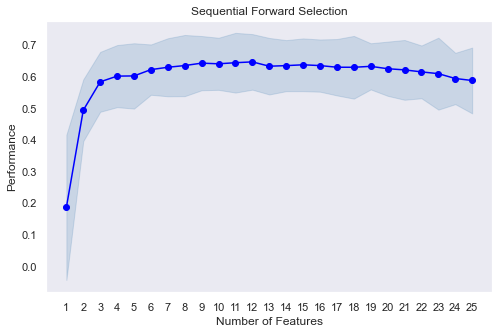

In [34]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [35]:
features=list(sfs.k_feature_names_)
features

['AtBat',
 'RBI',
 'Walks',
 'Years',
 'CRuns',
 'CRBI',
 'League',
 'Errors',
 'NewLeague',
 'Hits_new',
 'HmRun_new',
 'RBI_new']

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>New DataFrame after Feature Selection</b></p>

We have completed the feature selection process and let's define the new data frame with the specified feature:

In [36]:
df3= df2[features]

In [39]:
df_new=pd.concat([df3, df2["Salary"]], axis=1)

In [40]:
df_new

,AtBat,RBI,Walks,Years,CRuns,CRBI,League,Errors,NewLeague,Hits_new,HmRun_new,RBI_new,Salary
1,315,38,39,14,321,414,1,10,1,0.097006,0.101449,0.091787,475.0
2,479,72,76,3,224,266,0,14,0,0.284464,0.285714,0.270677,480.0
3,496,78,37,11,828,838,1,3,1,0.089524,0.088889,0.093079,500.0
4,321,42,30,2,48,46,1,4,1,0.861386,0.833333,0.913043,91.5
5,594,51,35,11,501,336,0,25,0,0.149162,0.210526,0.151786,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,48,37,5,379,311,1,3,1,0.157568,0.218750,0.154341,700.0
318,492,50,94,12,897,451,0,20,0,0.090007,0.128205,0.110865,875.0
319,475,43,52,6,217,93,0,7,0,0.290993,0.428571,0.462366,385.0
320,573,60,78,8,470,420,0,12,0,0.168028,0.092783,0.142857,960.0


In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 321
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      261 non-null    int64  
 1   RBI        261 non-null    int64  
 2   Walks      261 non-null    int64  
 3   Years      261 non-null    int64  
 4   CRuns      261 non-null    int64  
 5   CRBI       261 non-null    int64  
 6   League     261 non-null    int32  
 7   Errors     261 non-null    int64  
 8   NewLeague  261 non-null    int32  
 9   Hits_new   261 non-null    float64
 10  HmRun_new  261 non-null    float64
 11  RBI_new    261 non-null    float64
 12  Salary     261 non-null    float64
dtypes: float64(4), int32(2), int64(7)
memory usage: 26.5 KB


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Preprocessing</b></p>

## Handling numerical columns

In [42]:
#check if data is skewed
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [43]:
Numerical2=df_new.select_dtypes(exclude='object').columns.tolist()
Numerical2

['AtBat',
 'RBI',
 'Walks',
 'Years',
 'CRuns',
 'CRBI',
 'League',
 'Errors',
 'NewLeague',
 'Hits_new',
 'HmRun_new',
 'RBI_new',
 'Salary']

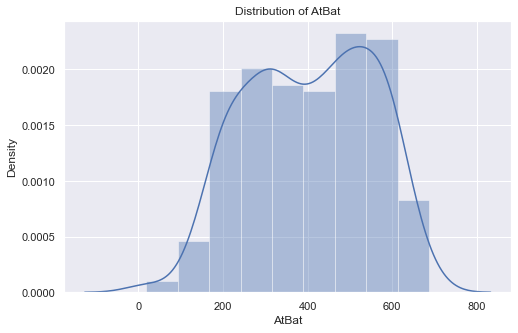

AtBat's: Skew: -0.1535701358569878, : SkewtestResult(statistic=-1.034592221530072, pvalue=0.3008593881516638)
****************************************


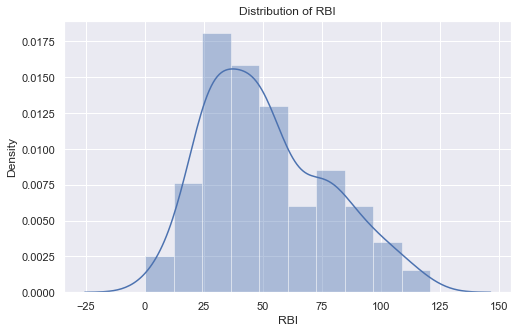

RBI's: Skew: 0.5553258950953689, : SkewtestResult(statistic=3.5355884123218564, pvalue=0.0004068680704573995)
****************************************


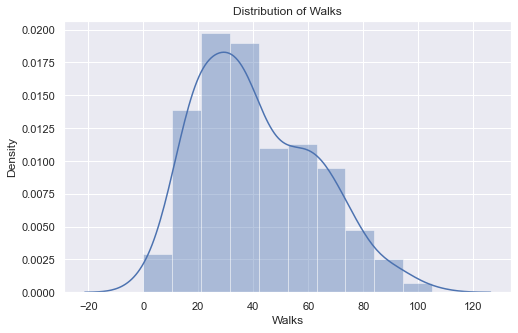

Walks's: Skew: 0.5237599323542911, : SkewtestResult(statistic=3.3549978443545547, pvalue=0.0007936560296404612)
****************************************


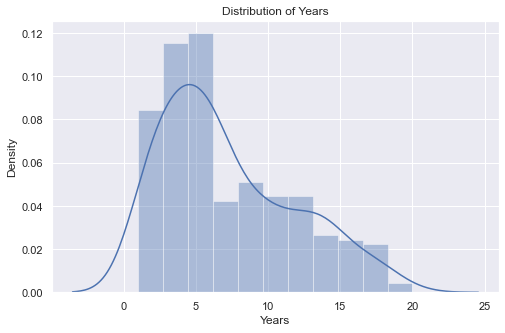

Years's: Skew: 0.7131537333054192, : SkewtestResult(statistic=4.392910953924989, pvalue=1.1184294515937573e-05)
****************************************


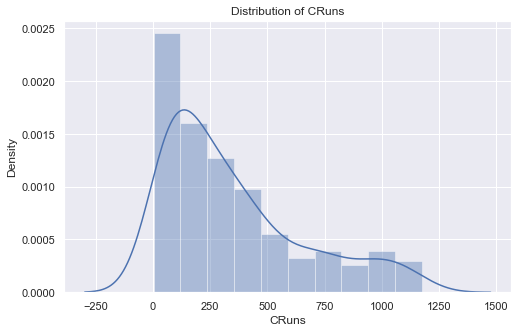

CRuns's: Skew: 1.066422161461624, : SkewtestResult(statistic=6.050278652043499, pvalue=1.4459550901555826e-09)
****************************************


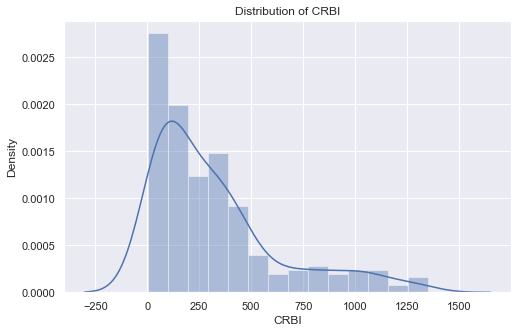

CRBI's: Skew: 1.4289763680431726, : SkewtestResult(statistic=7.437862748681123, pvalue=1.0232729311220445e-13)
****************************************


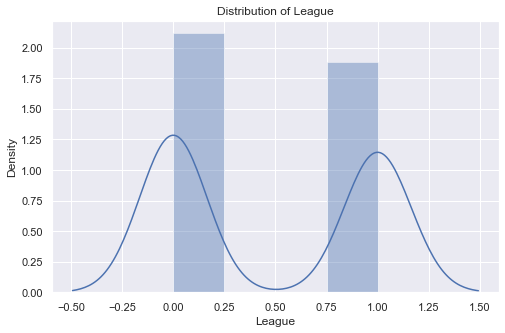

League's: Skew: 0.11513282476462616, : SkewtestResult(statistic=0.7774529407875272, pvalue=0.4368915884690081)
****************************************


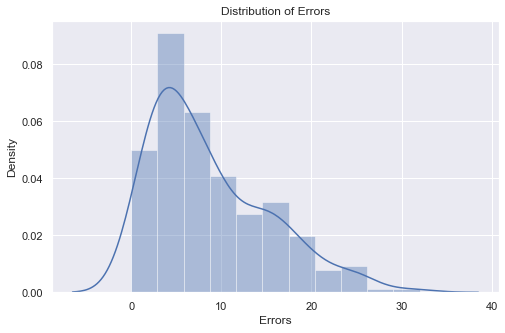

Errors's: Skew: 0.9417483643113663, : SkewtestResult(statistic=5.504004816670626, pvalue=3.712593976622666e-08)
****************************************


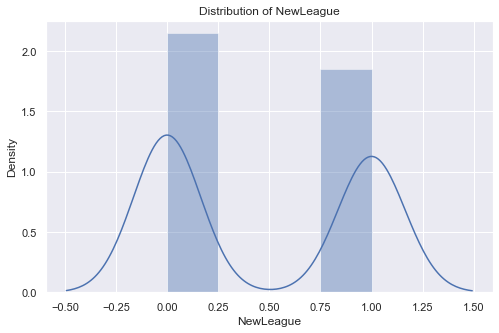

NewLeague's: Skew: 0.1459811894531072, : SkewtestResult(statistic=0.9839687598119616, pvalue=0.3251308734336329)
****************************************


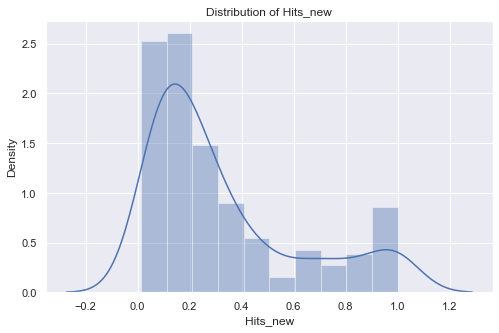

Hits_new's: Skew: 1.186253336046074, : SkewtestResult(statistic=6.539832372888263, pvalue=6.15878235630867e-11)
****************************************


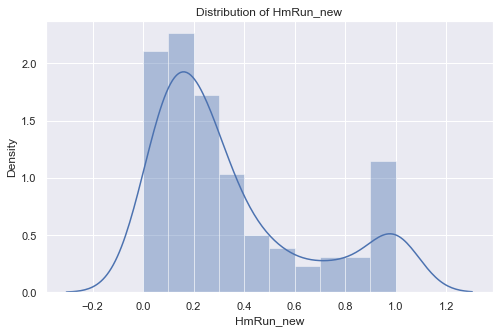

HmRun_new's: Skew: 1.1110818113325605, : SkewtestResult(statistic=6.2366191839876075, pvalue=4.471286820230422e-10)
****************************************


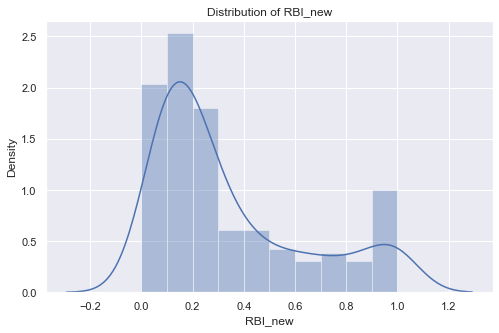

RBI_new's: Skew: 1.092140206213611, : SkewtestResult(statistic=6.158164822821759, pvalue=7.359274264424611e-10)
****************************************


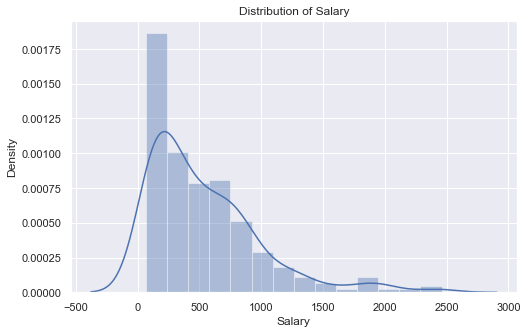

Salary's: Skew: 1.5798233258696555, : SkewtestResult(statistic=7.941289485743685, pvalue=2.0009007449021944e-15)
****************************************


In [44]:
for i in Numerical2:
    check_skew(df_new, i)
    print("*"*40)

- The skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
- The value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
- The value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

Source: https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.

For highly skewed ones we need to apply a log transformation:

In [45]:
df_new_log= df_new.copy()
for i in ["CRuns", "CRBI", "Hits_new", "HmRun_new", 'RBI_new', 'Salary']:
    df_new_log[i] = np.log(df_new_log[i]+1) #let do log(x+1) transformation. This is the best way to avoid error created by log transformation and is widely used among data scientists.

In [46]:
df_new_log

,AtBat,RBI,Walks,Years,CRuns,CRBI,League,Errors,NewLeague,Hits_new,HmRun_new,RBI_new,Salary
1,315,38,39,14,5.774552,6.028279,1,10,1,0.092585,0.096627,0.087816,6.165418
2,479,72,76,3,5.416100,5.587249,0,14,0,0.250341,0.251314,0.239550,6.175867
3,496,78,37,11,6.720220,6.732211,1,3,1,0.085741,0.085158,0.088998,6.216606
4,321,42,30,2,3.891820,3.850148,1,4,1,0.621321,0.606135,0.648695,4.527209
5,594,51,35,11,6.218600,5.820083,0,25,0,0.139033,0.191055,0.141314,6.621406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,48,37,5,5.940171,5.743003,1,3,1,0.146321,0.197826,0.143529,6.552508
318,492,50,94,12,6.800170,6.113682,0,20,0,0.086184,0.120628,0.105139,6.775366
319,475,43,52,6,5.384495,4.543295,0,7,0,0.255412,0.356675,0.380055,5.955837
320,573,60,78,8,6.154858,6.042633,0,12,0,0.155317,0.088728,0.133531,6.867974


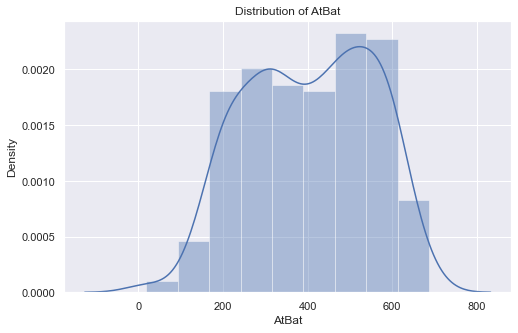

AtBat's: Skew: -0.1535701358569878, : SkewtestResult(statistic=-1.034592221530072, pvalue=0.3008593881516638)
****************************************


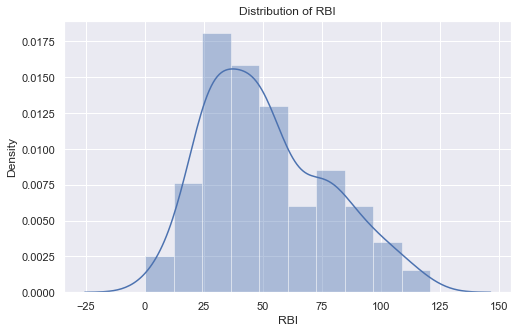

RBI's: Skew: 0.5553258950953689, : SkewtestResult(statistic=3.5355884123218564, pvalue=0.0004068680704573995)
****************************************


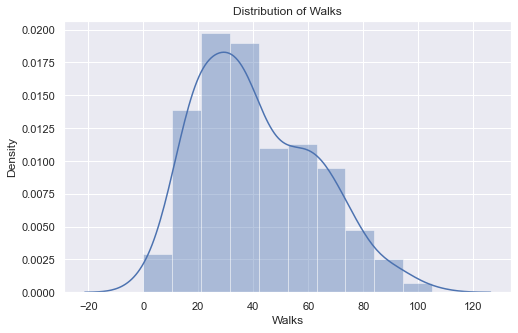

Walks's: Skew: 0.5237599323542911, : SkewtestResult(statistic=3.3549978443545547, pvalue=0.0007936560296404612)
****************************************


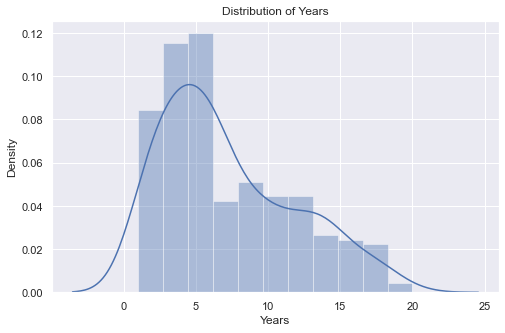

Years's: Skew: 0.7131537333054192, : SkewtestResult(statistic=4.392910953924989, pvalue=1.1184294515937573e-05)
****************************************


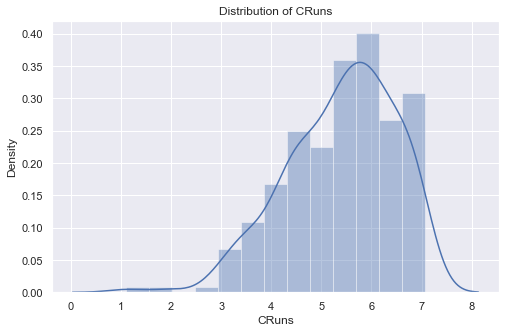

CRuns's: Skew: -0.6588544702820621, : SkewtestResult(statistic=-4.106524211870713, pvalue=4.016573777979896e-05)
****************************************


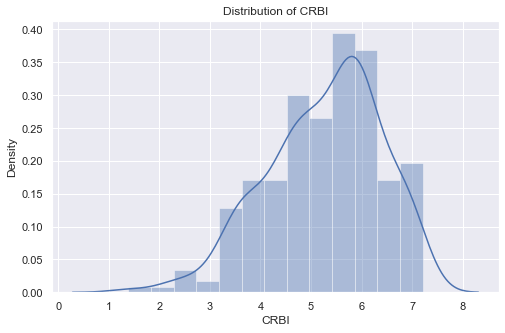

CRBI's: Skew: -0.5180570357686082, : SkewtestResult(statistic=-3.3220490866122536, pvalue=0.0008935897216905516)
****************************************


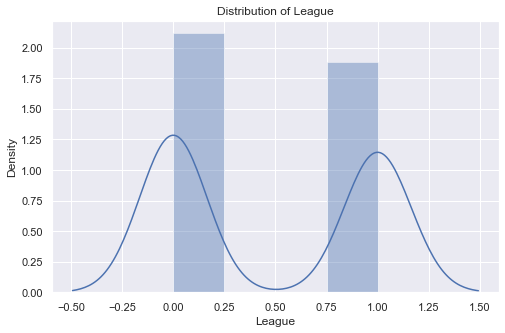

League's: Skew: 0.11513282476462616, : SkewtestResult(statistic=0.7774529407875272, pvalue=0.4368915884690081)
****************************************


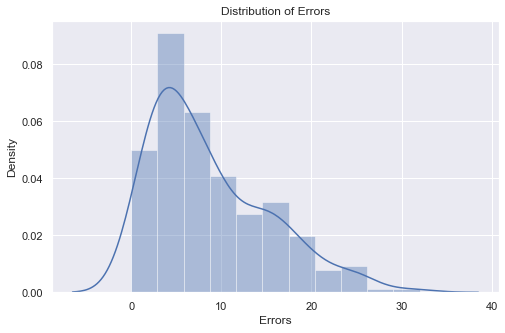

Errors's: Skew: 0.9417483643113663, : SkewtestResult(statistic=5.504004816670626, pvalue=3.712593976622666e-08)
****************************************


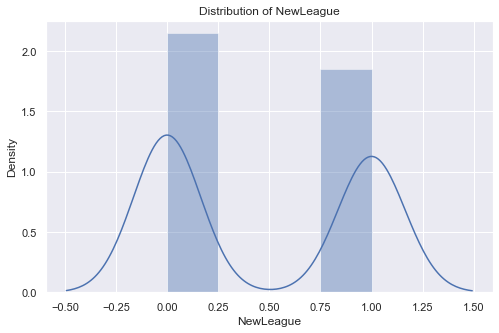

NewLeague's: Skew: 0.1459811894531072, : SkewtestResult(statistic=0.9839687598119616, pvalue=0.3251308734336329)
****************************************


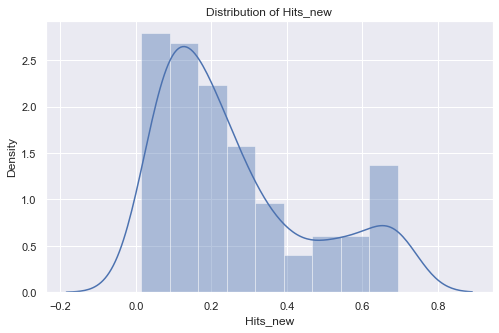

Hits_new's: Skew: 0.9543896730614808, : SkewtestResult(statistic=5.56121330835647, pvalue=2.6790550034726048e-08)
****************************************


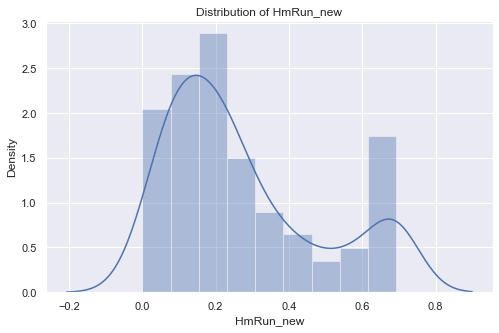

HmRun_new's: Skew: 0.8733672108075163, : SkewtestResult(statistic=5.187099320791946, pvalue=2.135948296412492e-07)
****************************************


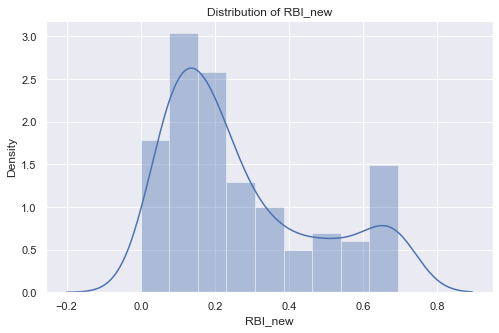

RBI_new's: Skew: 0.8758376430753652, : SkewtestResult(statistic=5.198770906166616, pvalue=2.006105894455079e-07)
****************************************


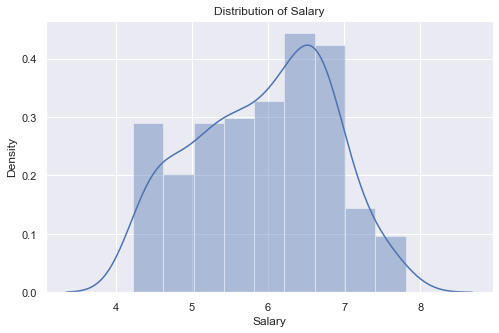

Salary's: Skew: -0.16587441471537734, : SkewtestResult(statistic=-1.1165012609232923, pvalue=0.2642076307565726)
****************************************


In [47]:
for i in Numerical2:
    check_skew(df_new_log, i)
    print("*"*40)

Let's apply StandardScaler:

In [48]:
for cols in Numerical2:
    df_new_log[cols] = scaler.fit_transform(df_new_log[[cols]])

In [49]:
df_new_log

,AtBat,RBI,Walks,Years,CRuns,CRBI,League,Errors,NewLeague,Hits_new,HmRun_new,RBI_new,Salary
1,-0.606030,-0.524139,-0.091161,1.471136,0.346561,0.679934,1.059222,0.206798,1.075651,-0.839785,-0.837422,-0.900723,0.268410
2,0.507918,0.789763,1.628257,-0.908375,0.013877,0.285542,-0.944089,0.813252,-0.929670,-0.050997,-0.099068,-0.154302,0.280199
3,0.623389,1.021628,-0.184102,0.822179,1.224248,1.309427,1.059222,-0.854496,1.075651,-0.874004,-0.892166,-0.894908,0.326160
4,-0.565276,-0.369563,-0.509398,-1.124694,-1.400827,-1.267864,1.059222,-0.702882,1.075651,1.803913,1.594564,1.858405,-1.579770
5,1.289041,-0.021765,-0.277044,0.822179,0.758688,0.493755,-0.944089,2.481000,-0.929670,-0.607544,-0.386697,-0.637554,0.782843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.630181,-0.137698,-0.184102,-0.475736,0.500274,0.424826,1.059222,-0.854496,1.075651,-0.571099,-0.354380,-0.626653,0.705114
318,0.596219,-0.060409,2.464730,1.038498,1.298451,0.756307,-0.944089,1.722933,-0.929670,-0.871789,-0.722860,-0.815508,0.956537
319,0.480749,-0.330919,0.512959,-0.259417,-0.015456,-0.648016,-0.944089,-0.248042,-0.929670,-0.025645,0.403837,0.536887,0.031968
320,1.146401,0.326032,1.721198,0.173221,0.699528,0.692771,-0.944089,0.510025,-0.929670,-0.526122,-0.875124,-0.675836,1.061015


## Handling categorical columns

In [50]:
Categorical2=df_new_log.select_dtypes(include='object').columns.tolist()
Categorical2

[]

There is no categorical column

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Building Models</b></p>

In [51]:
X= df_new_log.drop(["Salary"], axis=1)
y= df_new_log.Salary

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 12), (66, 12), (195,), (66,))

In [54]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [55]:
models= {"LR": LinearRegression(),
         "Ridge": Ridge(),
         "KNN": KNeighborsRegressor(),
         "CART": DecisionTreeRegressor(),
         "RF": RandomForestRegressor(),
         "SVR": SVR(),
         "GBM": GradientBoostingRegressor(),
         "XGBoost": XGBRegressor(),
         "LightGBM": LGBMRegressor()
        }

In [56]:
%%time
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

LR trained
Ridge trained
KNN trained
CART trained
RF trained
SVR trained
GBM trained
XGBoost trained
LightGBM trained
CPU times: total: 1.12 s
Wall time: 744 ms


In [57]:
model_df=pd.DataFrame()
model_df['model']=(models.keys())
model_df['model']

0          LR
1       Ridge
2         KNN
3        CART
4          RF
5         SVR
6         GBM
7     XGBoost
8    LightGBM
Name: model, dtype: object

In [58]:
model_df['r2_Score']=[models.get("LR").score(X_test, y_test),
                      models.get("Ridge").score(X_test, y_test),
                      models.get("KNN").score(X_test, y_test),
                      models.get("CART").score(X_test, y_test),
                      models.get("RF").score(X_test, y_test),
                      models.get("SVR").score(X_test, y_test),
                      models.get("GBM").score(X_test, y_test),
                      models.get("XGBoost").score(X_test, y_test),
                      models.get("LightGBM").score(X_test, y_test),
                     ]

In [59]:
model_df.sort_values(['r2_Score'], ascending=False)

,model,r2_Score
4,RF,0.760373
5,SVR,0.743293
3,CART,0.736692
1,Ridge,0.734183
0,LR,0.722322
7,XGBoost,0.713849
6,GBM,0.710077
8,LightGBM,0.690545
2,KNN,0.682216


The best R^2 predict we got is from RF. The prediction value is 0.760373.

In [60]:
def plot_importance(model, features, num=len(X), save=False):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features Importance')
    plt.tight_layout()
    plt.show()

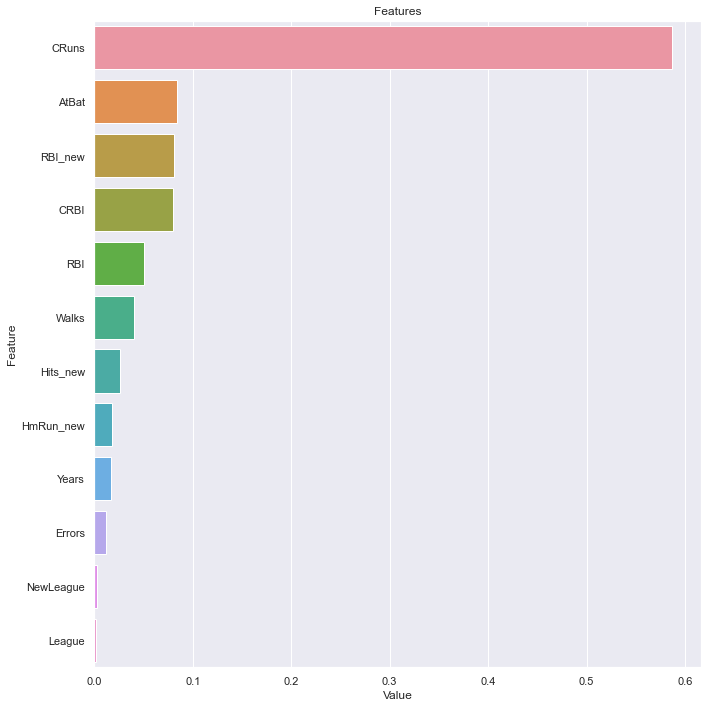

In [61]:
plot_importance(models.get("RF"), X_train)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Cross Validation for all models</b></p> 

In [62]:
from sklearn.model_selection import cross_val_score, KFold

In [63]:
%%time
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'r2', cv= kf)
    results[name] = result

CPU times: total: 9.22 s
Wall time: 5.19 s


In [64]:
print("r2 scores")
print("*********************************")
for name, result in results.items():
   
    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
LR : 0.671
----------------
Ridge : 0.669
----------------
KNN : 0.666
----------------
CART : 0.444
----------------
RF : 0.734
----------------
SVR : 0.735
----------------
GBM : 0.726
----------------
XGBoost : 0.746
----------------
LightGBM : 0.725
----------------


After Cross Validation, we get the best result in XGBoost model with 0.746.

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>GridSearchCV for XGBoost model</b></p>

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
%%time
XGB_param_grid = {'max_depth': range(2, 10, 1),
                  'n_estimators': range(60, 220, 40),
                  'learning_rate': [0.1, 0.01, 0.05]
                 }
XGB_GridCV = GridSearchCV(models.get("XGBoost"), XGB_param_grid, cv=5, n_jobs= -1)
XGB_GridCV.fit(X_train,y_train)  
print(XGB_GridCV.best_params_)    
print(XGB_GridCV.best_score_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.782437480175932
CPU times: total: 3.11 s
Wall time: 37.3 s


Parameters after GridSearch: **{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}**

Score: **0.782437**

***Thanks for reading. I hope you enjoy it and that it was helpful to you.***

***Please don't forget to follow me and give an upvote on***

**[Kaggle](https://www.kaggle.com/yaseminturker) | [GitHub](https://github.com/yaseminturker) | [Linkedin](https://www.linkedin.com/in/yasemin-turker/) ✌️**
